In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using Theano backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 10

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train samples: {}'.format(X_train.shape[0]))
print('Test samples: {}'.format(X_test.shape[0]))

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Train samples: 50000
Test samples: 10000


In [3]:
model = Sequential()

model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    nb_epoch=epochs,
    validation_data=(X_test, Y_test),
    shuffle=True,
    verbose=1
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 365s - loss: 1.5515 - acc: 0.4329 - val_loss: 1.2106 - val_acc: 0.5635
Epoch 2/10
50000/50000 [==============================] - 392s - loss: 1.1491 - acc: 0.5924 - val_loss: 0.9340 - val_acc: 0.6705
Epoch 3/10
50000/50000 [==============================] - 400s - loss: 0.9932 - acc: 0.6490 - val_loss: 0.8423 - val_acc: 0.7066
Epoch 4/10
50000/50000 [==============================] - 429s - loss: 0.9058 - acc: 0.6813 - val_loss: 0.7784 - val_acc: 0.7328
Epoch 5/10
50000/50000 [==============================] - 425s - loss: 0.8362 - acc: 0.7057 - val_loss: 0.7750 - val_acc: 0.7328
Epoch 6/10
50000/50000 [==============================] - 507s - loss: 0.7889 - acc: 0.7218 - val_loss: 0.7411 - val_acc: 0.7436
Epoch 7/10
50000/50000 [==============================] - 405s - loss: 0.7512 - acc: 0.7342 - val_loss: 0.7418 - val_acc: 0.7463
Epoch 8/10
50000/50000 [=======================

In [4]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 23s    


[0.6896761489868164, 0.76370000000000005]

10/10 [==============================] - 0s


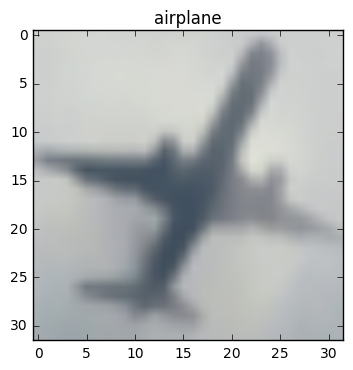

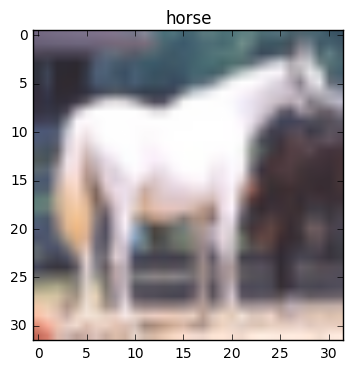

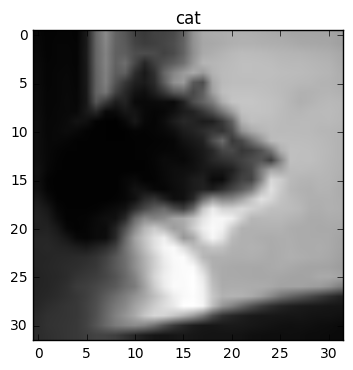

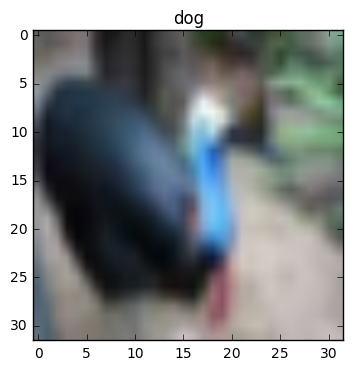

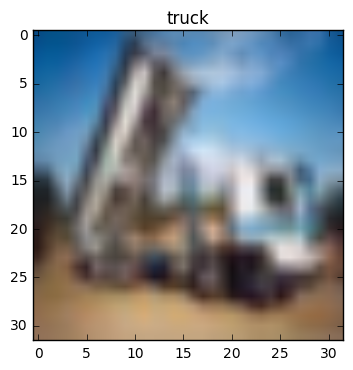

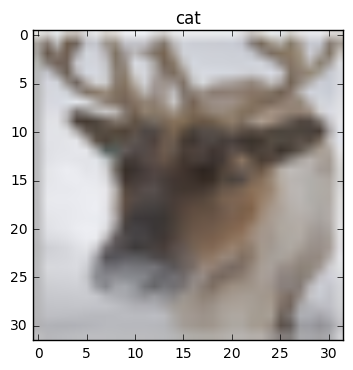

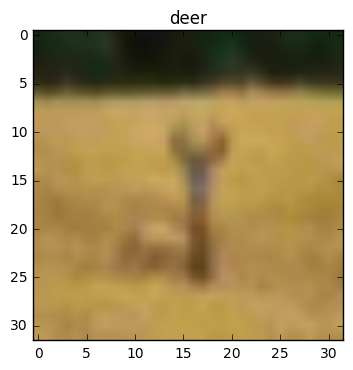

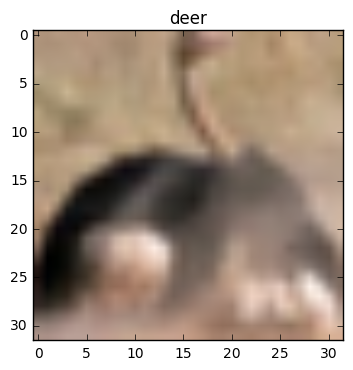

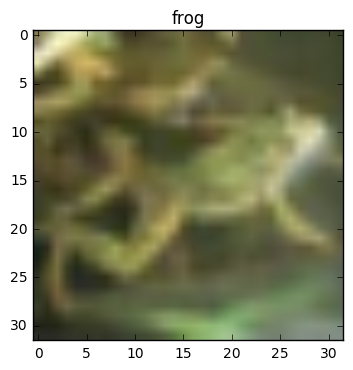

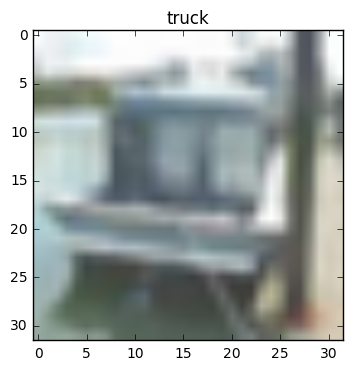

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline


cifar_classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

images = random.sample(X_test, 10)
predictions = model.predict_classes(np.array(images).reshape((10, 3, 32, 32)))

for image, prediction in zip(images, predictions):    
    plt.figure()
    plt.title(cifar_classes[prediction])
    plt.imshow(image.transpose(1, 2, 0))
